# Setup

In [12]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid", font_scale=1.0)

# Load and Prepare Data

In [13]:
with open("../datasets/processed/cwe_freq.json", "r") as f:
    cwe_data = json.load(f)

df = pd.DataFrame(cwe_data)
df = df.sort_values("count", ascending=False).reset_index(drop=True)

# Bar Chart - Top CWE Classes

C:\Users\jakeh\AppData\Local\Temp\ipykernel_20972\3606086007.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="count", y="cwe_id", palette="crest")


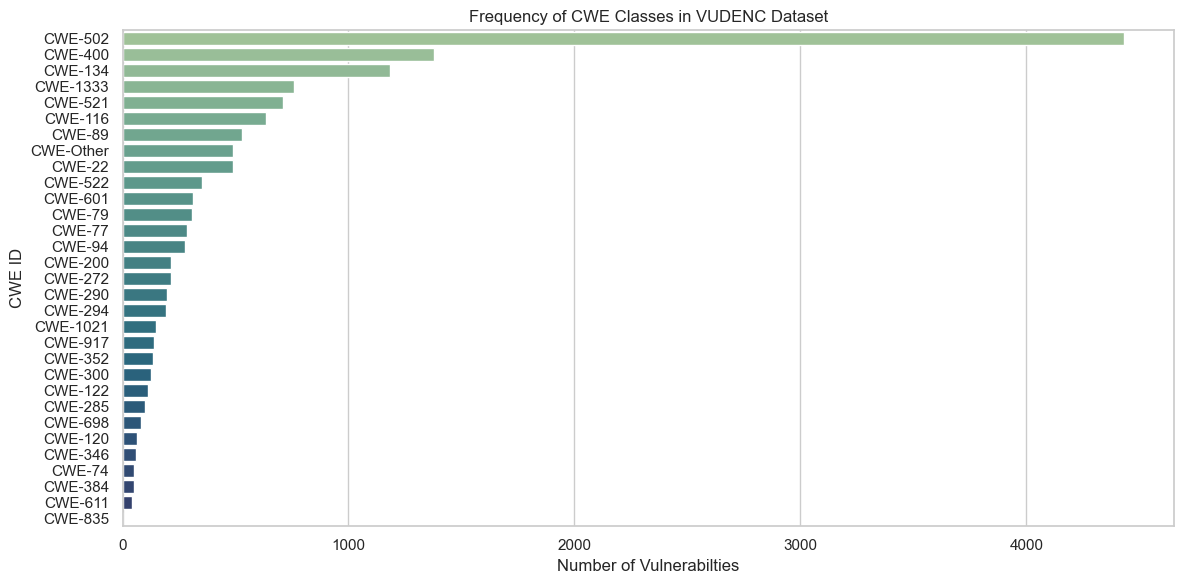

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="count", y="cwe_id", palette="crest")
plt.title("Frequency of CWE Classes in VUDENC Dataset")
plt.xlabel("Number of Vulnerabilties")
plt.ylabel("CWE ID")
plt.tight_layout()
plt.show()

# Cumulative Coverage Plot

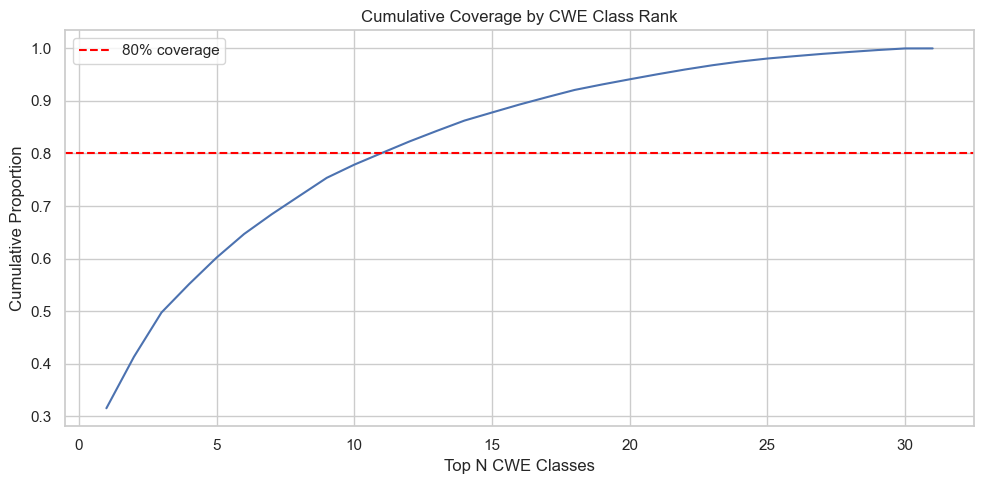

In [15]:
df["cumulative"] = df["count"].cumsum() / df["count"].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, len(df)+1), y=df["cumulative"])
plt.axhline(0.8, ls="--", color="red", label="80% coverage")
plt.title("Cumulative Coverage by CWE Class Rank")
plt.xlabel("Top N CWE Classes")
plt.ylabel("Cumulative Proportion")
plt.legend()
plt.tight_layout()
plt.show()


# Bar Chart - Top CWE Family Classes

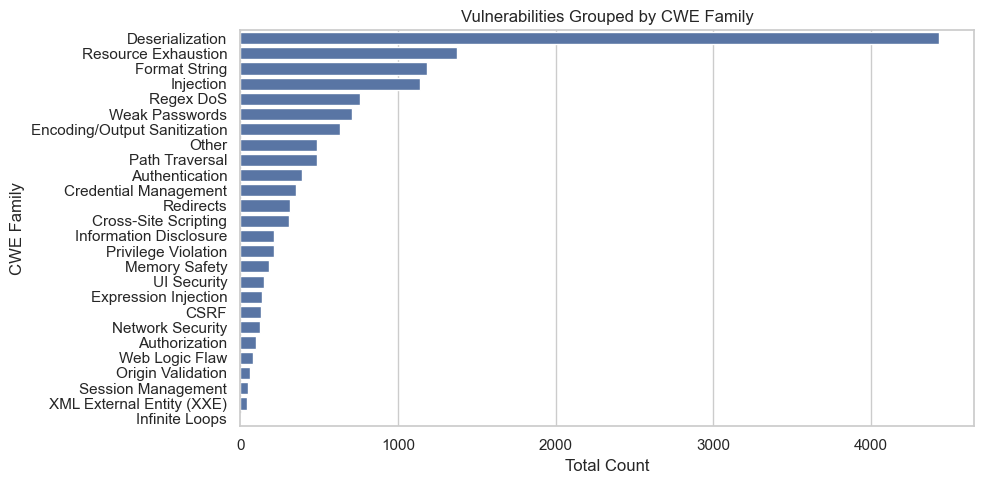

In [16]:
with open("cwe_id_family_map.json", "r") as f:
    cwe_id_fam_map = json.load(f)

# Map families
df["family"] = df["cwe_id"].map(cwe_id_fam_map).fillna("Other")

# Group and plot
family_df = df.groupby("family", as_index=False)["count"].sum().sort_values("count", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=family_df, x="count", y="family")
plt.title("Vulnerabilities Grouped by CWE Family")
plt.xlabel("Total Count")
plt.ylabel("CWE Family")
plt.tight_layout()
plt.show()